In [1]:
# import the libraries as shown below
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
     r"C:\Users\madhu\Desktop\Skin burn project\dataset3\train",
    seed=123,
    shuffle=True,
    image_size=(224,224),
    batch_size=32
)

Found 2951 files belonging to 4 classes.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_set = train_datagen.flow_from_directory(
         r"C:\Users\madhu\Desktop\Skin burn project\dataset3\train",
        target_size=(224,224),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 2951 images belonging to 4 classes.


In [4]:
train_set.class_indices

{'Degree1': 0, 'Degree2': 1, 'Degree3': 2, 'healthy': 3}

In [5]:
class_names = list(train_set.class_indices.keys())
class_names

['Degree1', 'Degree2', 'Degree3', 'healthy']

In [6]:
count=0
for image_batch, label_batch in train_set:
#     print(label_batch)
    print(image_batch[4])
    break
#     count+=1
#     if count>2:
#         break

[[[0.6409962  0.59785897 0.6213884 ]
  [0.6415677  0.59843045 0.62195987]
  [0.64213926 0.599002   0.6225314 ]
  ...
  [0.58113337 0.47525102 0.30662355]
  [0.58431375 0.4784314  0.30980393]
  [0.58770007 0.4818177  0.31319022]]

 [[0.6269183  0.58378106 0.60837585]
  [0.62706125 0.583924   0.608233  ]
  [0.6272041  0.58406687 0.60809004]
  ...
  [0.58199066 0.47610828 0.30748084]
  [0.58431375 0.4784314  0.30980393]
  [0.5878429  0.48196056 0.31333312]]

 [[0.6251196  0.5819824  0.6133549 ]
  [0.62469095 0.5815537  0.61292624]
  [0.62426233 0.5811251  0.6124976 ]
  ...
  [0.58284795 0.4769656  0.30833814]
  [0.58431375 0.4784314  0.30980393]
  [0.5879858  0.48210347 0.31347603]]

 ...

 [[0.35368973 0.28310147 0.2674152 ]
  [0.3651997  0.29461148 0.2789252 ]
  [0.37303767 0.3024494  0.28676313]
  ...
  [0.25146902 0.13382195 0.12597881]
  [0.25175476 0.13410771 0.12626457]
  [0.25204054 0.13439347 0.12655033]]

 [[0.35411838 0.28353012 0.26784384]
  [0.3654855  0.29489723 0.27921095]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_set = validation_datagen.flow_from_directory(
         r"C:\Users\madhu\Desktop\Skin burn project\dataset3\val",
        target_size=(224,224),
        batch_size=32,
        class_mode="sparse"
)

Found 368 images belonging to 4 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_set = test_datagen.flow_from_directory(
         r"C:\Users\madhu\Desktop\Skin burn project\dataset3\test",
        target_size=(224,224),
        batch_size=32,
        class_mode="sparse"
)

Found 371 images belonging to 4 classes.


In [9]:
for image_batch, label_batch in test_set:
    print(image_batch[0])
    break

[[[0.79374087 0.6266718  0.502558  ]
  [0.79914796 0.6284742  0.5057121 ]
  [0.80455494 0.6302765  0.50886625]
  ...
  [0.7647843  0.5852492  0.53800833]
  [0.7148422  0.5244773  0.508791  ]
  [0.74138415 0.55844676 0.5409945 ]]

 [[0.68097585 0.53868276 0.40501177]
  [0.700351   0.55580497 0.42303512]
  [0.71972615 0.5729271  0.44105846]
  ...
  [0.7521679  0.5699293  0.52944726]
  [0.7170951  0.5271808  0.5114945 ]
  [0.7454394  0.5638538  0.54595095]]

 [[0.648098   0.46217373 0.3859243 ]
  [0.6386357  0.46397606 0.3746597 ]
  [0.62917346 0.46577838 0.3633951 ]
  ...
  [0.73955154 0.5546095  0.5208861 ]
  [0.719348   0.5298843  0.514198  ]
  [0.7494947  0.56926084 0.5509074 ]]

 ...

 [[0.5728657  0.46949217 0.3598466 ]
  [0.55440587 0.4563667  0.33749115]
  [0.5213629  0.45579028 0.31498215]
  ...
  [0.45553032 0.3323367  0.34373304]
  [0.4528268  0.34224954 0.36085525]
  [0.45012328 0.3521624  0.37797746]]

 [[0.57016224 0.46768984 0.3566925 ]
  [0.5535047  0.45546553 0.3361394 ]


In [10]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [11]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [13]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(4, activation='softmax')(x)

In [14]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  train_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set),
    callbacks=[earlystopping]
)

Epoch 1/100
93/93 [==============================] - 447s 5s/step - loss: 0.5508 - accuracy: 0.8201 - val_loss: 0.3175 - val_accuracy: 0.8625
Epoch 2/100
93/93 [==============================] - 448s 5s/step - loss: 0.3195 - accuracy: 0.8807 - val_loss: 0.3161 - val_accuracy: 0.8733
Epoch 3/100
93/93 [==============================] - 450s 5s/step - loss: 0.2404 - accuracy: 0.9051 - val_loss: 0.4251 - val_accuracy: 0.8760
Epoch 4/100
93/93 [==============================] - 449s 5s/step - loss: 0.1898 - accuracy: 0.9295 - val_loss: 0.3104 - val_accuracy: 0.8787
Epoch 5/100
93/93 [==============================] - 460s 5s/step - loss: 0.1963 - accuracy: 0.9268 - val_loss: 0.3650 - val_accuracy: 0.8733
Epoch 6/100
93/93 [==============================] - 457s 5s/step - loss: 0.1389 - accuracy: 0.9515 - val_loss: 0.3052 - val_accuracy: 0.8868
Epoch 7/100
93/93 [==============================] - 452s 5s/step - loss: 0.1355 - accuracy: 0.9509 - val_loss: 0.3142 - val_accuracy: 0.8733
Epoch 

In [19]:
acc =r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

In [21]:
scores = model.evaluate(test_set)

12/12 [==============================] - 43s 4s/step - loss: 0.3175 - accuracy: 0.8868


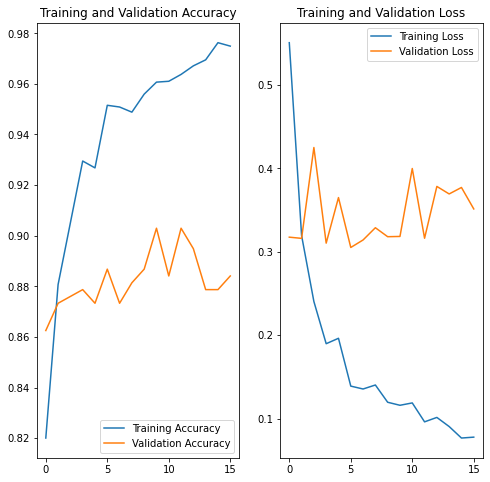

In [22]:
EPOCHS=16
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
scores = model.evaluate(test_set)

8/8 [==============================] - 18s 2s/step - loss: 0.8406 - accuracy: 0.8240


In [23]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 139ms/step


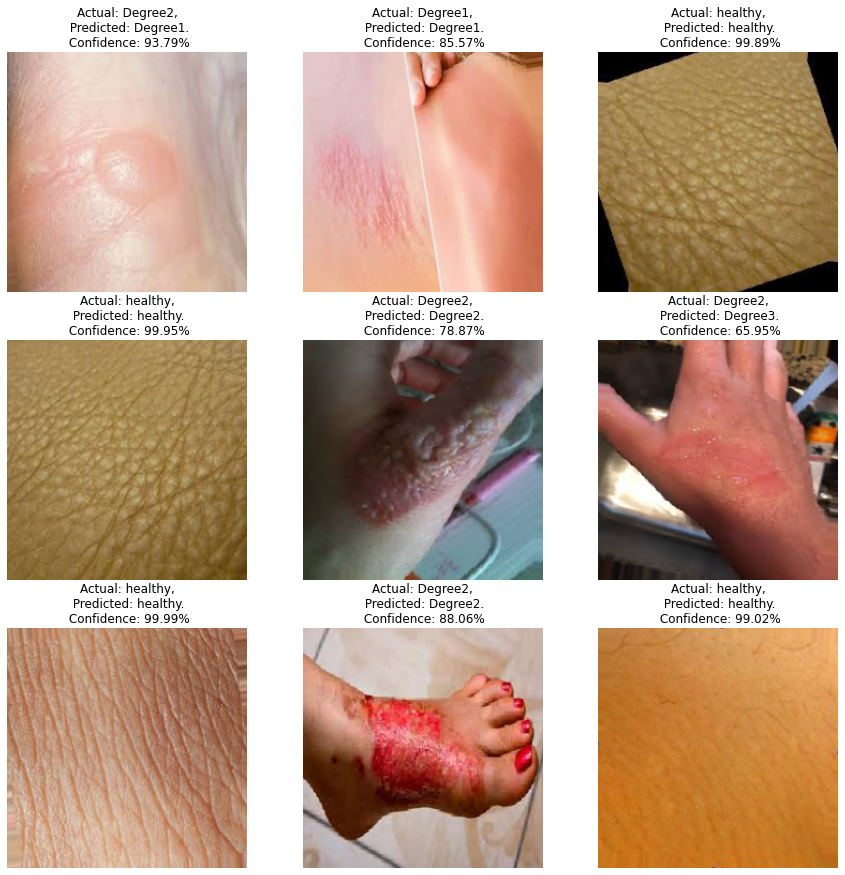

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [27]:
model.save('vgg19_final.h5')

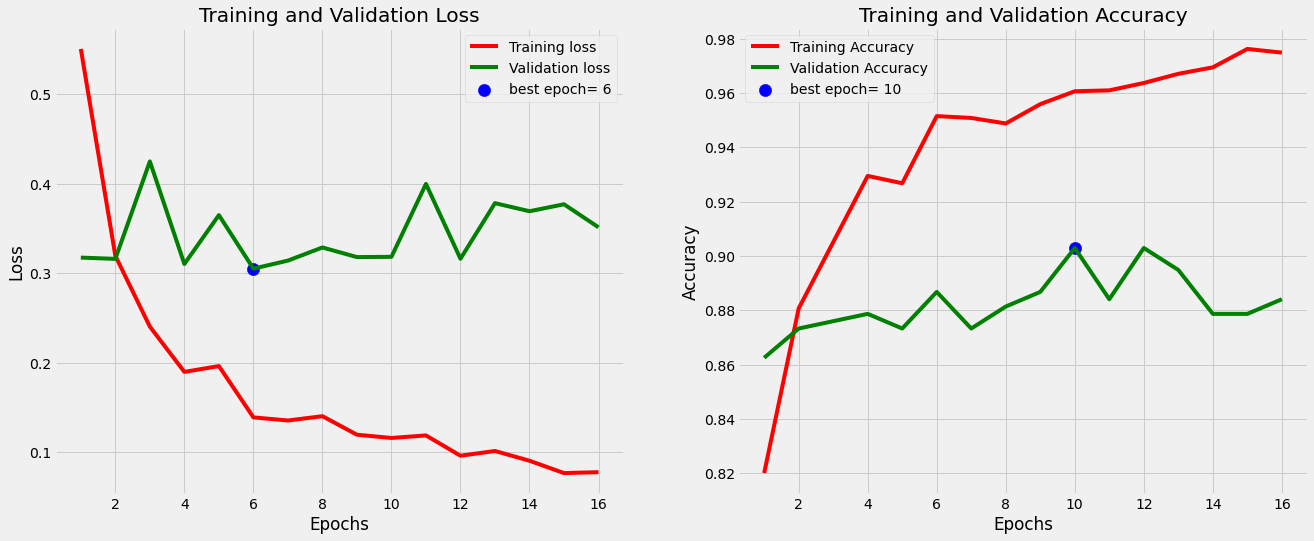

In [31]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    
tr_plot(r,0)


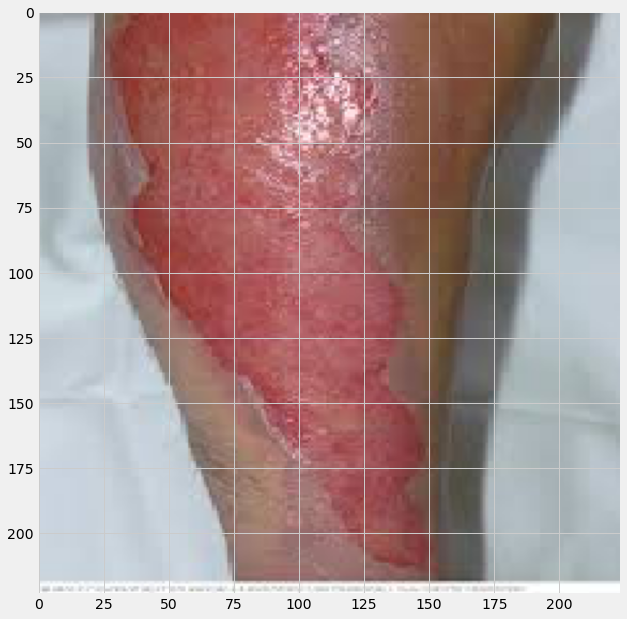

In [32]:
image = tf.keras.preprocessing.image.load_img(r"C:\Users\madhu\Desktop\Skin burn project\dataset\Degree2\img333.jpg", target_size=(224, 224))
image = np.array(image)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

image = np.expand_dims(image, axis=0)

In [33]:
# What the model predicts
prediction = model.predict(image)
print("Prediction:", prediction.argmax())
print("Probability:", prediction.max())

1/1 [==============================] - 0s 119ms/step
Prediction: 2
Probability: 1.0


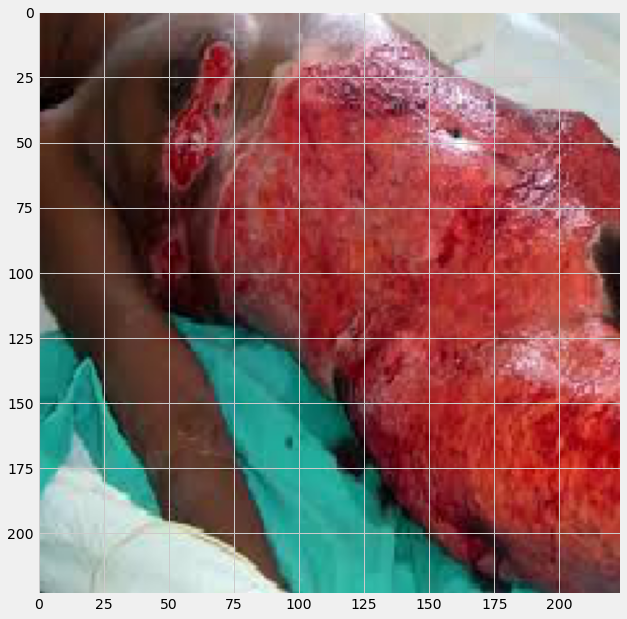

In [34]:
image = tf.keras.preprocessing.image.load_img(r'C:\Users\madhu\Desktop\Skin burn project\dataset2\test\Degree3\img953.jpg', target_size=(224, 224))
image = np.array(image)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

image = np.expand_dims(image, axis=0)

In [115]:
# What the model predicts
prediction = model.predict(imge)
print("Prediction:", prediction.argmax())
print("Probability:", prediction.max())

1/1 [==============================] - 0s 124ms/step
Prediction: 2
Probability: 1.0


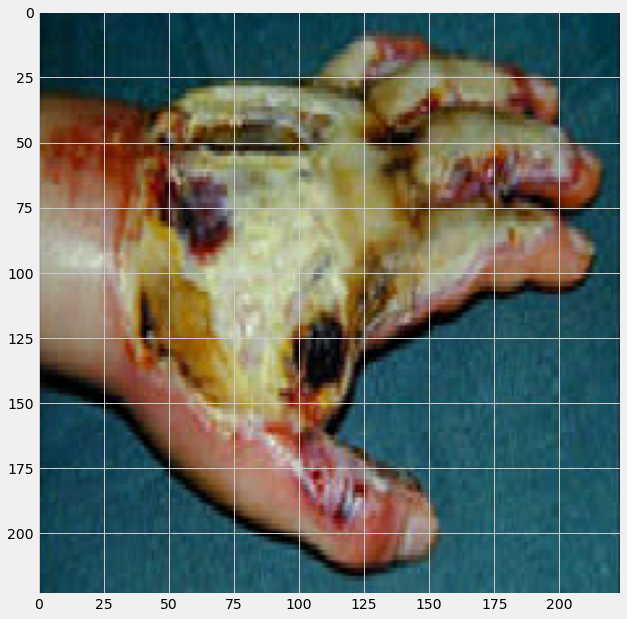

In [37]:
image = tf.keras.preprocessing.image.load_img(r'"C:\Users\madhu\Desktop\Skin burn project\dataset3\train\Degree3\img170.jpg', target_size=(224, 224))
image = np.array(image)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

image = np.expand_dims(image, axis=0)

In [38]:
# What the model predicts
prediction = model.predict(image)
print("Prediction:", prediction.argmax())
print("Probability:", prediction.max())

1/1 [==============================] - 0s 275ms/step
Prediction: 2
Probability: 1.0


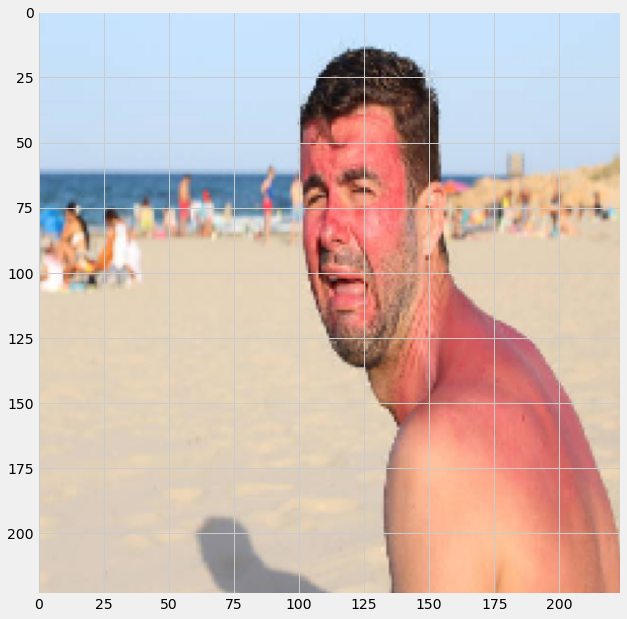

In [185]:
image1 = tf.keras.preprocessing.image.load_img(r"C:\Users\madhu\Desktop\Skin burn project\sunburn.jpg",target_size=(224,224))
image1 = np.array(image1)

plt.figure(figsize=(10, 10))
plt.imshow(image1)
plt.show()

new_image = tf.expand_dims(image1,axis=0)

In [186]:
# What the model predicts
prediction = model.predict(new_image)
print("Prediction:", prediction.argmax())
print("Probability:", prediction.max())

1/1 [==============================] - 0s 115ms/step
Prediction: 0
Probability: 1.0


In [150]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
img1=image.load_img(r'C:\Users\madhu\Desktop\Skin burn project\healthyskin.jpg',target_size=(224,224))

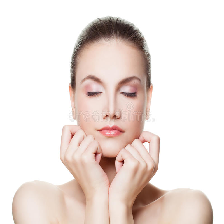

In [151]:
img1

In [153]:
x=image.img_to_array(img1)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [154]:
x.shape

(224, 224, 3)

In [155]:
x=x/255

In [156]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [157]:
model.predict(img_data)

1/1 [==============================] - 0s 121ms/step


array([[9.99940753e-01, 1.12227134e-07, 4.77616224e-10, 5.91431926e-05]],
      dtype=float32)

In [158]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 122ms/step


In [160]:
a==3

array([False])

In [94]:
from tensorflow.keras.models import load_model

model.save('vgg19.h5')

In [95]:
y_pred = model.predict(test_set)

12/12 [==============================] - 38s 3s/step


In [96]:
y_pred

array([[6.6317945e-05, 1.3135273e-04, 2.2807233e-05, 9.9977952e-01],
       [1.3568403e-01, 8.2185996e-01, 2.7402902e-02, 1.5053099e-02],
       [9.1007175e-03, 1.4518260e-03, 3.0263007e-04, 9.8914486e-01],
       ...,
       [1.5310851e-04, 1.7280413e-02, 9.8256624e-01, 2.9347339e-07],
       [6.5048249e-03, 1.4935779e-02, 2.1877568e-02, 9.5668191e-01],
       [2.6631416e-04, 1.6247957e-04, 6.5857814e-05, 9.9950528e-01]],
      dtype=float32)

In [97]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [98]:
y_pred

array([3, 1, 3, 3, 3, 3, 0, 3, 1, 3, 3, 2, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1,
       3, 0, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 1, 3, 3, 3, 3, 1, 3, 3, 0, 3, 1, 3, 3, 3, 3,
       3, 3, 1, 3, 1, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 1, 3, 3, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 2, 0, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 0, 0, 0, 0, 3, 3, 1, 0, 3, 1, 3, 3, 3, 0, 3, 3, 3, 2,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 2, 2, 0, 3, 0, 0, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       3, 3, 3, 0, 2, 3, 3, 0, 3, 3, 0, 2, 2, 3, 0, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 0, 3, 3, 3, 2, 1, 3, 3, 0, 3, 0, 3, 0, 0,

In [99]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [101]:
model=load_model('vgg19.h5')

In [102]:
img_data

array([[[[-103.41351 , -116.41429 , -123.44079 ],
         [-103.366455, -116.394684, -123.429016],
         [-103.30371 , -116.30841 , -123.323135],
         ...,
         [-103.072334, -116.057434, -123.06824 ],
         [-103.16253 , -116.14763 , -123.15843 ],
         [-103.10763 , -116.112335, -123.15059 ]],

        [[-103.16645 , -116.11626 , -123.15059 ],
         [-103.37822 , -116.35155 , -123.39372 ],
         [-103.288025, -116.24959 , -123.272156],
         ...,
         [-103.21352 , -116.20253 , -123.221176],
         [-102.946846, -115.9437  , -122.958435],
         [-103.18214 , -116.186844, -123.2251  ]],

        [[-103.35861 , -116.35939 , -123.3898  ],
         [-103.27626 , -116.30057 , -123.32706 ],
         [-103.35861 , -116.379   , -123.401566],
         ...,
         [-103.33116 , -116.320175, -123.33882 ],
         [-103.150764, -116.15155 , -123.17804 ],
         [-103.24097 , -116.23782 , -123.27608 ]],

        ...,

        [[-103.42136 , -116.19469 , -1

In [103]:
img=image.load_img(r'C:\Users\madhu\Desktop\Skin burn project\degree2burn.jpg',target_size=(224,224))

In [104]:
x=image.img_to_array(img)
x

array([[[ 61.,  93., 134.],
        [ 64.,  98., 146.],
        [ 91., 120., 162.],
        ...,
        [156., 184., 221.],
        [133., 161., 198.],
        [135., 170., 212.]],

       [[135., 169., 197.],
        [ 73., 109., 143.],
        [104., 135., 166.],
        ...,
        [117., 147., 185.],
        [184., 213., 253.],
        [116., 151., 193.]],

       [[ 74., 107., 148.],
        [ 90., 122., 169.],
        [ 71., 102., 148.],
        ...,
        [ 87., 117., 155.],
        [128., 160., 201.],
        [103., 138., 178.]],

       ...,

       [[200., 149., 132.],
        [203., 151., 138.],
        [197., 148., 133.],
        ...,
        [ 59.,  93., 130.],
        [ 76., 109., 144.],
        [106., 141., 179.]],

       [[206., 153., 139.],
        [201., 149., 136.],
        [206., 155., 138.],
        ...,
        [ 68., 102., 139.],
        [ 75., 109., 146.],
        [ 80., 114., 151.]],

       [[200., 147., 133.],
        [209., 157., 144.],
        [200., 1

In [105]:
x=x/255

In [106]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [107]:
model.predict(img_data)

1/1 [==============================] - 0s 266ms/step


array([[9.9993384e-01, 9.8810354e-08, 3.7520170e-10, 6.6085660e-05]],
      dtype=float32)

In [108]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 123ms/step


In [110]:
a==0

array([ True])